In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
df_or = pd.read_csv('antiviral_original.csv')
df_o=pd.read_csv('antiviral_object.csv')
df_f = pd.read_csv('antiviral.csv')

In [157]:
df_or.shape, df_o.shape, df_f.shape

((5958, 11), (1876, 5), (3486, 5))

In [158]:
df_or.describe()

,Sequence,Source,Target_Organism,Assay,Linear_Cyclic,N-terminal_Modification,C-terminal_Modification,Other_Modification,Binding_Target,experimental_characteristics,Half_Life
count,5958,5955,5958,5259,5958,5958,5958,912,5955,5958,5838
unique,1852,185,105,123,4,20,33,164,62,3,22
top,SLDQINVTFLDLEYEMKKLEEAIKKLEESYIDLKELGSGSG,Synthetic construct,HIV,ELISA,Linear,Free,Free,"The 'X' at position 4,8,11,15 indicates S-pent...",Not found,E_coli,>10 hour
freq,27,2460,2148,393,5466,4521,4011,48,1755,1986,1149


In [159]:
df_o.describe()

,sequence,half_life,is_mod,modifications,experimental_characteristics
count,1876,1876,1876,604,1876
unique,1100,2,2,26,3
top,AAAMSQVTN,>10 hour,False,"Acetylation, Amidation",E_coli
freq,2,1062,1272,238,1062


In [160]:
df_f.describe()

,half_life_seconds
count,3486.000000
mean,19861.222031
std,52374.499897
min,120.000000
25%,180.000000
50%,2880.000000
75%,10080.000000
max,360000.000000


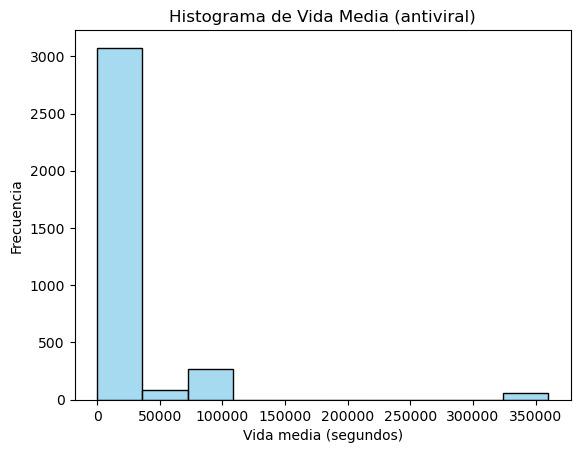

In [161]:
sns.histplot(df_f['half_life_seconds'], bins=10, color='skyblue', kde=False)

plt.xlabel('Vida media (segundos)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Vida Media (antiviral)')
plt.show()

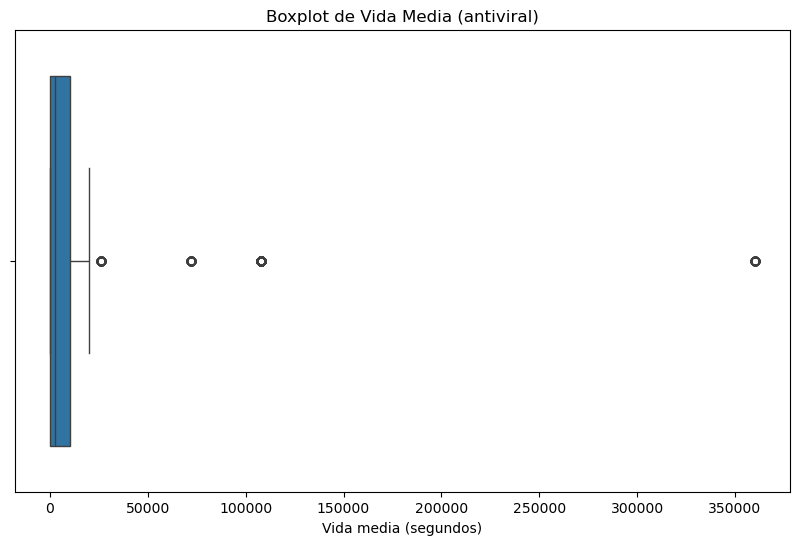

In [162]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='half_life_seconds', data=df_f)
plt.title('Boxplot de Vida Media (antiviral)')
plt.xlabel('Vida media (segundos)')
plt.show()

In [163]:
df_o['is_mod'].value_counts()

is_mod
False    1272
True      604
Name: count, dtype: int64

In [164]:
df_f['is_mod'].value_counts()

is_mod
False    2347
True     1139
Name: count, dtype: int64

In [165]:
from sklearn.ensemble import IsolationForest

In [166]:
iso_forest = IsolationForest(contamination=0.20, random_state=10)
df_f['is_outlier'] = iso_forest.fit_predict(df_f[['half_life_seconds']])
df_no_outliers = df_f[df_f['is_outlier'] == 1] 
print(df_no_outliers[['half_life_seconds']].describe())

       half_life_seconds
count        2919.000000
mean         3814.080164
std          5554.667591
min           120.000000
25%           120.000000
50%           600.000000
75%          4680.000000
max         19800.000000


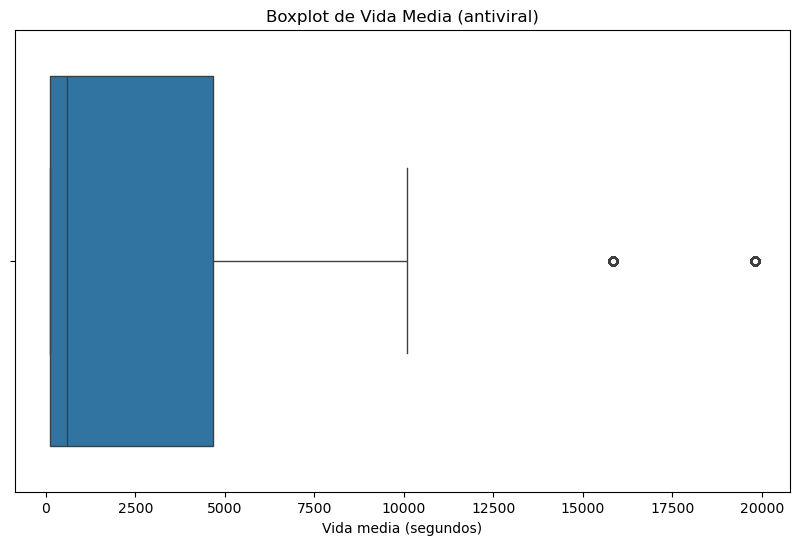

In [167]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='half_life_seconds', data=df_no_outliers)
plt.title('Boxplot de Vida Media (antiviral)')
plt.xlabel('Vida media (segundos)')
plt.show()

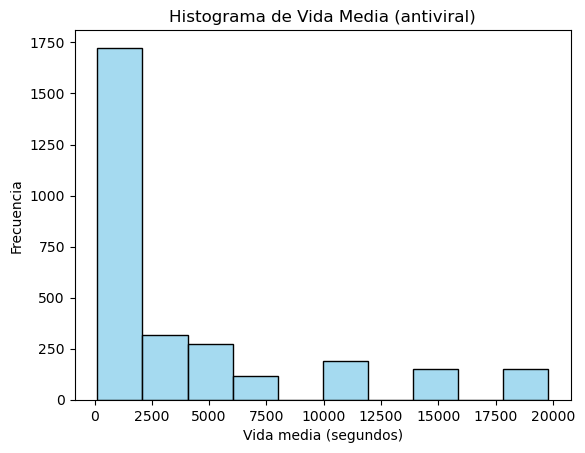

In [168]:
sns.histplot(df_no_outliers['half_life_seconds'], bins=10, color='skyblue', kde=False)

plt.xlabel('Vida media (segundos)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Vida Media (antiviral)')
plt.show()